# Customer Retention Enhancement through Predictive Analytics

In [185]:
#Import Libraries
import pandas as pd

In [186]:
# Load the Excel file and check sheet names
file_path = "Customer_Churn_Data_Large.xlsx"
sheets = pd.read_excel(file_path, sheet_name=None)

In [187]:
# Print sheet names
print(list(sheets.keys()))

['Customer_Demographics', 'Transaction_History', 'Customer_Service', 'Online_Activity', 'Churn_Status']


In [188]:
# Extract individual sheets
demographics_df = sheets['Customer_Demographics']
transactions_df = sheets['Transaction_History']
service_df = sheets['Customer_Service']
online_df = sheets['Online_Activity']
churn_df = sheets['Churn_Status']

In [189]:
# Preview the shape of each sheet
{
    "Customer_Demographics": demographics_df.shape,
    "Transaction_History": transactions_df.shape,
    "Customer_Service": service_df.shape,
    "Online_Activity": online_df.shape,
    "Churn_Status": churn_df.shape
}

{'Customer_Demographics': (1000, 5),
 'Transaction_History': (5054, 5),
 'Customer_Service': (1002, 5),
 'Online_Activity': (1000, 4),
 'Churn_Status': (1000, 2)}

In [190]:
# Display basic information and first few rows from each DataFrame
{
    "Customer_Demographics": demographics_df.info(),
    "Transaction_History": transactions_df.info(),
    "Customer_Service": service_df.info(),
    "Online_Activity": online_df.info(),
    "Churn_Status": churn_df.info()
}

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1000 non-null   int64 
 1   Age            1000 non-null   int64 
 2   Gender         1000 non-null   object
 3   MaritalStatus  1000 non-null   object
 4   IncomeLevel    1000 non-null   object
dtypes: int64(2), object(3)
memory usage: 39.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5054 entries, 0 to 5053
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CustomerID       5054 non-null   int64         
 1   TransactionID    5054 non-null   int64         
 2   TransactionDate  5054 non-null   datetime64[ns]
 3   AmountSpent      5054 non-null   float64       
 4   ProductCategory  5054 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory 

{'Customer_Demographics': None,
 'Transaction_History': None,
 'Customer_Service': None,
 'Online_Activity': None,
 'Churn_Status': None}

In [191]:
# Preview the first few rows of each DataFrame
{
    "Customer_Demographics": demographics_df.head(),
    "Transaction_History": transactions_df.head(),
    "Customer_Service": service_df.head(),
    "Online_Activity": online_df.head(),
    "Churn_Status": churn_df.head()
}

{'Customer_Demographics':    CustomerID  Age Gender MaritalStatus IncomeLevel
 0           1   62      M        Single         Low
 1           2   65      M       Married         Low
 2           3   18      M        Single         Low
 3           4   21      M       Widowed         Low
 4           5   21      M      Divorced      Medium,
 'Transaction_History':    CustomerID  TransactionID TransactionDate  AmountSpent ProductCategory
 0           1           7194      2022-03-27       416.50     Electronics
 1           2           7250      2022-08-08        54.96        Clothing
 2           2           9660      2022-07-25       197.50     Electronics
 3           2           2998      2022-01-25       101.31       Furniture
 4           2           1228      2022-07-24       397.37        Clothing,
 'Customer_Service':    CustomerID  InteractionID InteractionDate InteractionType ResolutionStatus
 0           1           6363      2022-03-31         Inquiry         Resolved
 1  

In [192]:
# Aggregate transaction data per customer
transaction_agg = transactions_df.groupby('CustomerID').agg({
    'AmountSpent': ['sum', 'mean', 'count'],
    'ProductCategory': pd.Series.nunique
})
transaction_agg.columns = ['TotalSpent', 'AvgSpent', 'NumTransactions', 'UniqueCategories']
transaction_agg.reset_index(inplace=True)

In [193]:
# Aggregate customer service interactions
service_agg = service_df.groupby('CustomerID').agg({
    'InteractionID': 'count',
    'ResolutionStatus': lambda x: (x == 'Resolved').sum()
})
service_agg.columns = ['TotalInteractions', 'ResolvedInteractions']
service_agg['ResolutionRate'] = service_agg['ResolvedInteractions'] / service_agg['TotalInteractions']
service_agg.reset_index(inplace=True)

In [194]:
# Merge all datasets into one
merged_df = demographics_df \
    .merge(transaction_agg, on='CustomerID', how='left') \
    .merge(service_agg, on='CustomerID', how='left') \
    .merge(online_df, on='CustomerID', how='left') \
    .merge(churn_df, on='CustomerID', how='left')

In [195]:
# Final NA handling (for customers with no transactions/service)
fill_values = {
    'TotalSpent': 0, 'AvgSpent': 0, 'NumTransactions': 0, 
    'UniqueCategories': 0, 'TotalInteractions': 0, 'ResolutionRate': 0
    }

In [196]:
merged_df.fillna(fill_values, inplace=True)

In [197]:
# Preview merged data
merged_df.head()

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,TotalSpent,AvgSpent,NumTransactions,UniqueCategories,TotalInteractions,ResolvedInteractions,ResolutionRate,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus
0,1,62,M,Single,Low,416.50,416.50000,1,1,1.0,1.0,1.0,2023-10-21,34,Mobile App,0
1,2,65,M,Married,Low,1547.42,221.06000,7,4,1.0,1.0,1.0,2023-12-05,5,Website,1
2,3,18,M,Single,Low,1702.98,283.83000,6,4,1.0,1.0,1.0,2023-11-15,3,Website,0
3,4,21,M,Widowed,Low,917.29,183.45800,5,4,2.0,1.0,0.5,2023-08-25,2,Website,0
4,5,21,M,Divorced,Medium,2001.49,250.18625,8,3,0.0,NaN,0.0,2023-10-27,41,Website,0


# Exploratory Data Analysis (EDA)

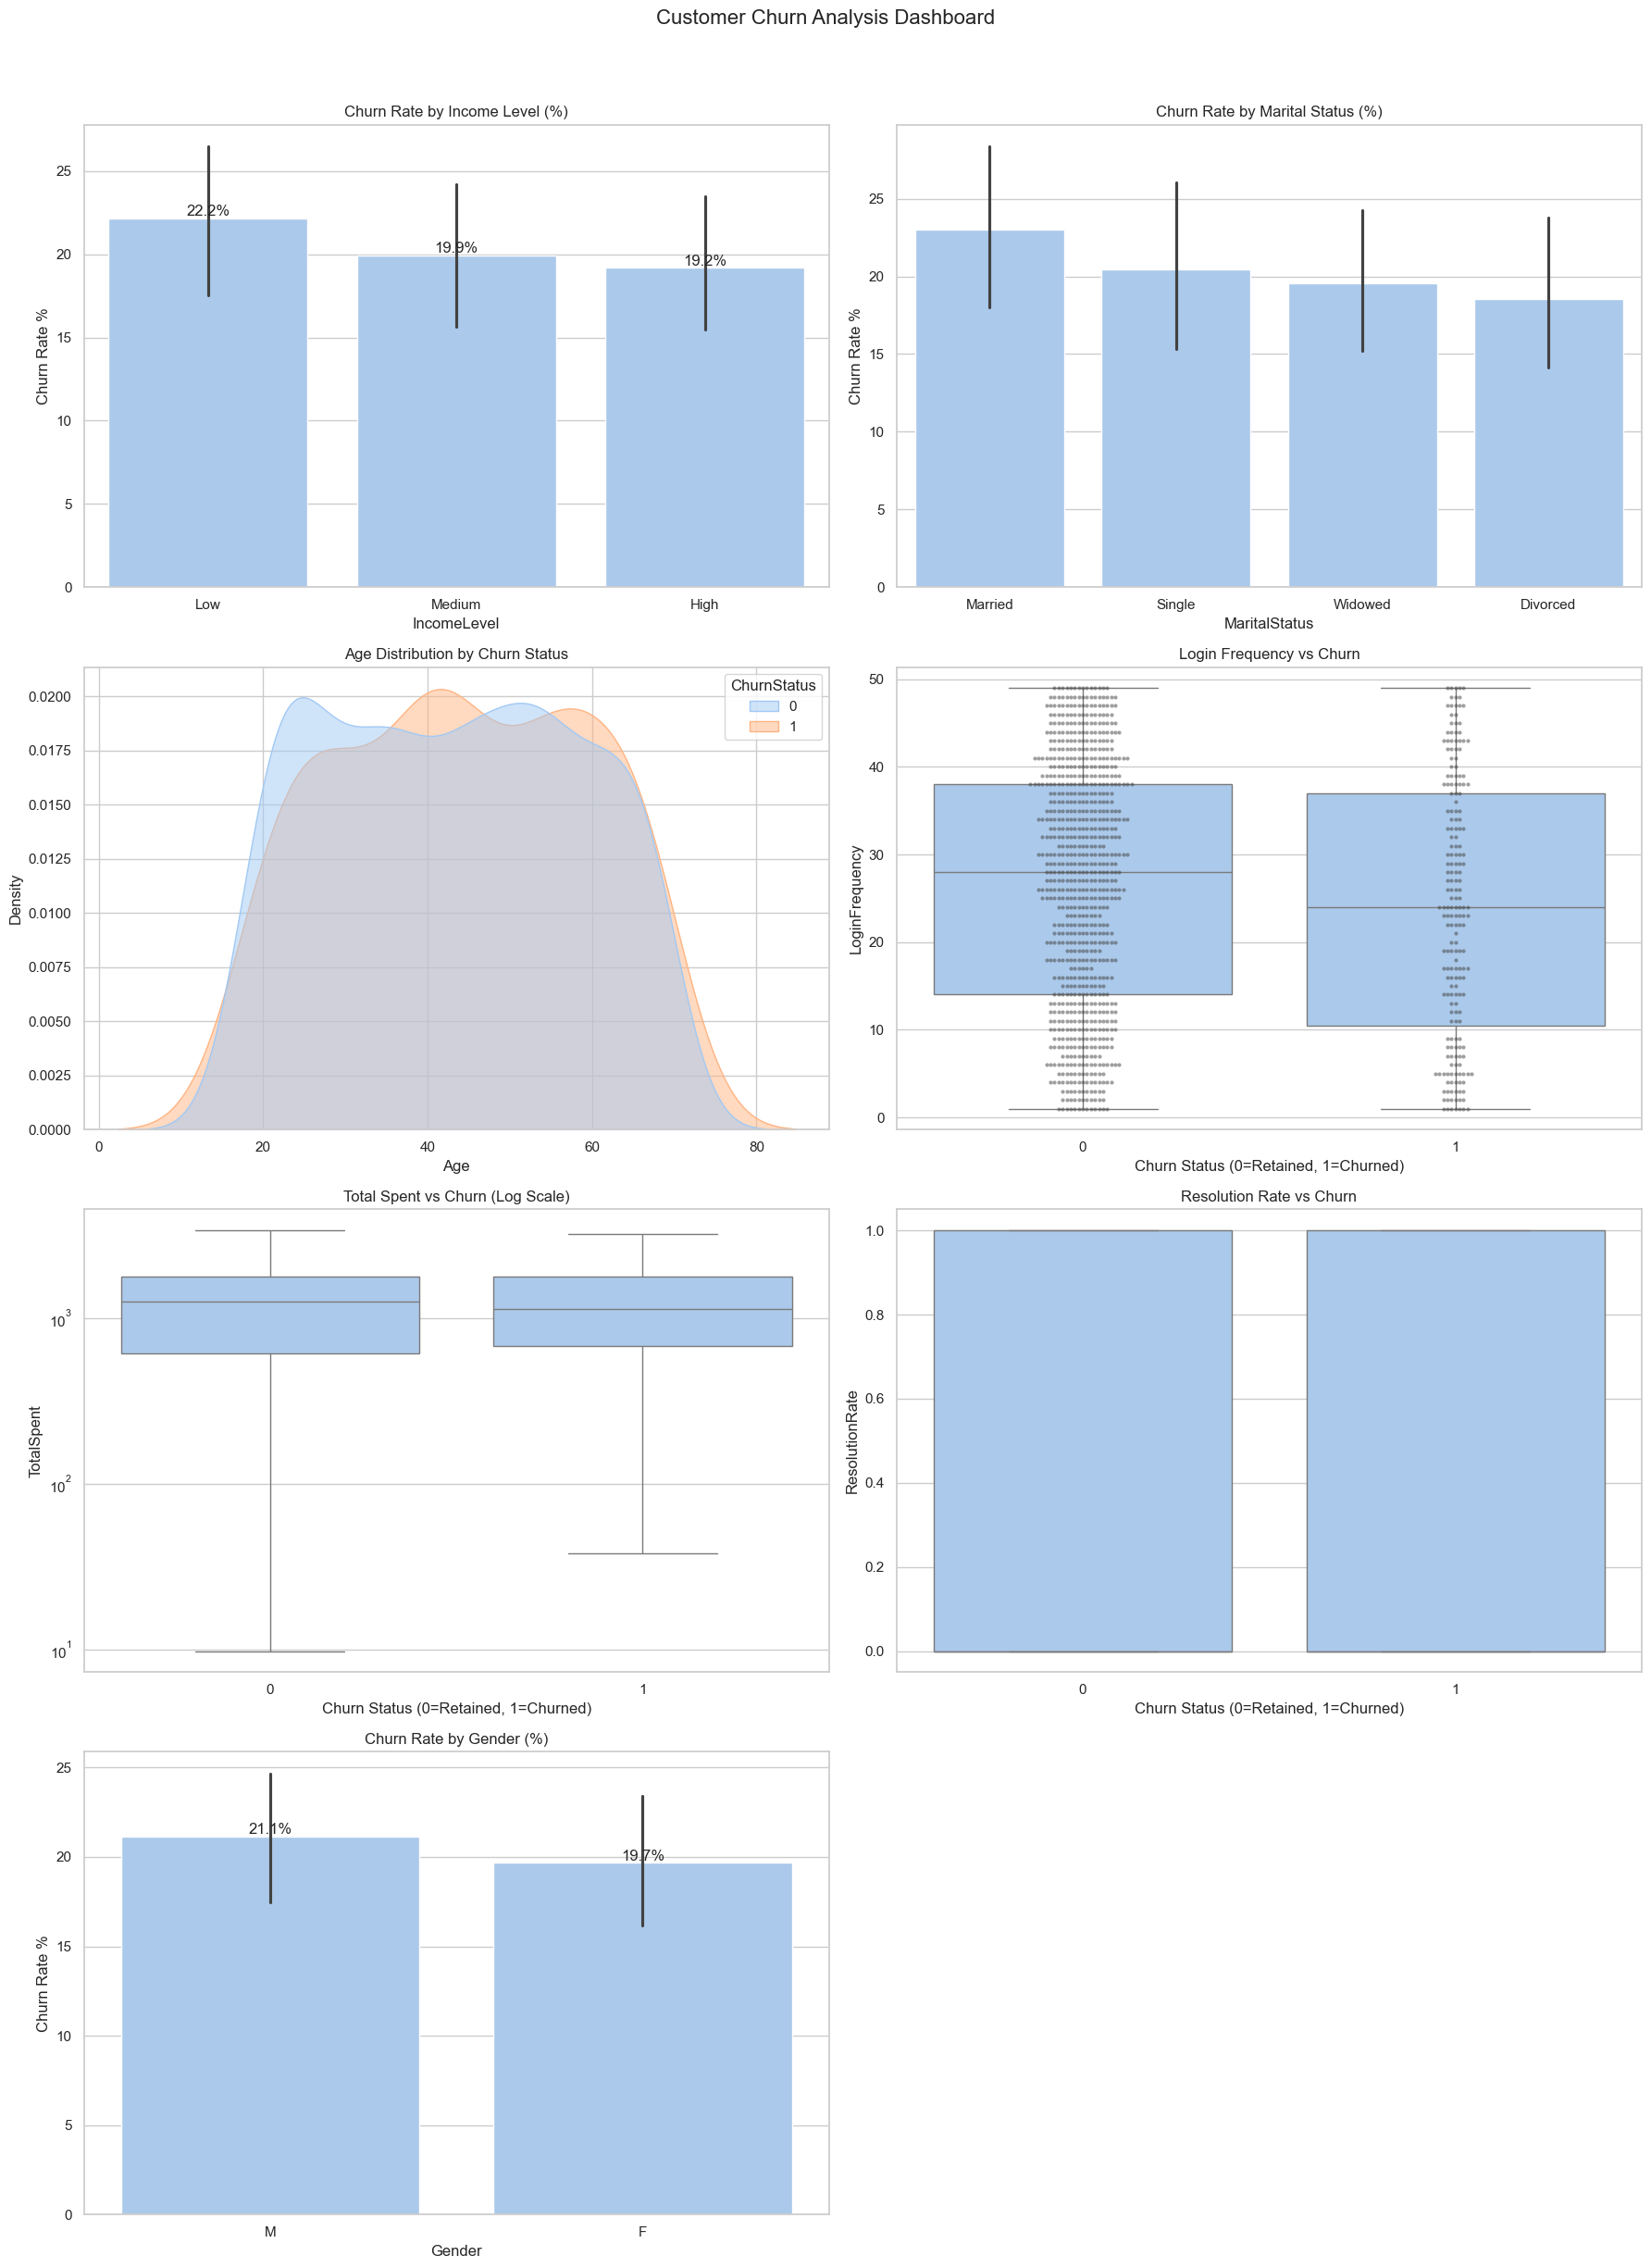

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Clean Age column - convert to numeric and handle missing/invalid values
merged_df['Age'] = pd.to_numeric(merged_df['Age'], errors='coerce')  # Convert non-numeric to NaN
merged_df['Age'] = merged_df['Age'].fillna(merged_df['Age'].median())  # Fill missing with median

# Set plot style and layout
plt.figure(figsize=(18, 24))  # Increased height to accommodate 7th plot
sns.set(style="whitegrid", palette="pastel")
plt.suptitle('Customer Churn Analysis Dashboard', y=1.02, fontsize=16)

# Plot 1: Churn rate by income level (with percentages)
plt.subplot(4, 2, 1)  # Changed to 4 rows to accommodate 7 plots
ax = sns.barplot(
    data=merged_df, 
    x='IncomeLevel', 
    y='ChurnStatus', 
    estimator=lambda x: sum(x)*100/len(x)
)
plt.title('Churn Rate by Income Level (%)')
plt.ylabel('Churn Rate %')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

# Plot 2: Churn rate by marital status (sorted)
plt.subplot(4, 2, 2)
order = merged_df.groupby('MaritalStatus')['ChurnStatus'].mean().sort_values(ascending=False).index
sns.barplot(
    data=merged_df, 
    x='MaritalStatus', 
    y='ChurnStatus', 
    order=order,
    estimator=lambda x: sum(x)*100/len(x)
)
plt.title('Churn Rate by Marital Status (%)')
plt.ylabel('Churn Rate %')

# Plot 3: Age distribution by churn status (fixed)
plt.subplot(4, 2, 3)
sns.kdeplot(
    data=merged_df, 
    x='Age', 
    hue='ChurnStatus', 
    fill=True,
    common_norm=False,
    alpha=0.5
)
plt.title('Age Distribution by Churn Status')
plt.xlabel('Age')
plt.ylabel('Density')

# Plot 4: Login frequency by churn status (with swarmplot overlay)
plt.subplot(4, 2, 4)
sns.boxplot(
    data=merged_df, 
    x='ChurnStatus', 
    y='LoginFrequency',
    showfliers=False
)
sns.swarmplot(
    data=merged_df,
    x='ChurnStatus',
    y='LoginFrequency',
    color='.25',
    alpha=0.5,
    size=3
)
plt.title('Login Frequency vs Churn')
plt.xlabel('Churn Status (0=Retained, 1=Churned)')

# Plot 5: Total spent by churn status (log scale)
plt.subplot(4, 2, 5)
sns.boxplot(
    data=merged_df, 
    x='ChurnStatus', 
    y='TotalSpent',
    showfliers=False
)
plt.yscale('log')
plt.title('Total Spent vs Churn (Log Scale)')
plt.xlabel('Churn Status (0=Retained, 1=Churned)')

# Plot 6: Resolution rate by churn status (with statistical test)
plt.subplot(4, 2, 6)
sns.boxplot(
    data=merged_df, 
    x='ChurnStatus', 
    y='ResolutionRate',
    showfliers=False
)
plt.title('Resolution Rate vs Churn')
plt.xlabel('Churn Status (0=Retained, 1=Churned)')

# Plot 7: Churn by Gender (added as 7th plot)
plt.subplot(4, 2, 7)
ax = sns.barplot(
    data=merged_df, 
    x='Gender', 
    y='ChurnStatus', 
    estimator=lambda x: sum(x)*100/len(x)
)
plt.title('Churn Rate by Gender (%)')
plt.ylabel('Churn Rate %')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.tight_layout()
plt.show()

# Data Cleaning and Preprocessing

In [201]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import joblib

# --- 1. Initial Setup ---
def preprocess_data(df, test_size=0.2, random_state=42):
    """
    Complete preprocessing pipeline for customer churn data
    
    Parameters:
    df -- Raw merged DataFrame
    test_size -- Proportion for test split (default 0.2)
    random_state -- Random seed (default 42)
    
    Returns:
    X_train, X_test, y_train, y_test -- Processed splits
    preprocessor -- Fitted preprocessing pipeline
    """

    # --- 2. Make copy and drop non-predictive columns ---
    df = merged_df.copy()
    df.drop(['CustomerID', 'LastLoginDate'], axis=1, inplace=True, errors='ignore')

    # --- 3. Ensure Target is Integer ---
    df['ChurnStatus'] = df['ChurnStatus'].astype(int)

    # --- 4. Feature Engineering ---
    df['ValuePerLogin'] = df['TotalSpent'] / (df['LoginFrequency'] + 1)
    df['ResolutionDeficit'] = 1 - df['ResolutionRate']

    # --- 5. Outlier Capping using IQR ---
    outlier_cols = ['TotalSpent', 'ValuePerLogin', 'LoginFrequency', 'ResolutionRate']
    for col in outlier_cols:
        if col in df.columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            df[col] = np.where(df[col] > upper, upper,
                               np.where(df[col] < lower, lower, df[col]))

    # --- 6. Identify Column Types ---
    numeric_cols = df.select_dtypes(include=['int64', 'float64'])
    numeric_cols = numeric_cols.drop(columns='ChurnStatus', errors='ignore').columns.tolist()
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

    # --- 7. Define Pipelines ---
    numeric_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    categorical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='if_binary'))
    ])

    preprocessor = ColumnTransformer([
        ('num', numeric_pipeline, numeric_cols),
        ('cat', categorical_pipeline, categorical_cols)
    ])

    # --- 8. Split Data ---
    X = df.drop(columns='ChurnStatus')
    y = df['ChurnStatus']
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )

    # --- 9. Apply Preprocessing (Fit & Transform) ---
    X_train_processed = preprocessor.fit_transform(X_train)
    X_test_processed = preprocessor.transform(X_test)

    # --- 10. Get Feature Names ---
    numeric_features = numeric_cols
    categorical_features = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols)
    all_features = numeric_features + categorical_features.tolist()

    # --- 11. Create DataFrames ---
    train_df = pd.DataFrame(X_train_processed, columns=all_features)
    train_df['ChurnStatus'] = y_train.reset_index(drop=True)

    test_df = pd.DataFrame(X_test_processed, columns=all_features)
    test_df['ChurnStatus'] = y_test.reset_index(drop=True)

    # --- 12. Export Data ---
    train_df.to_csv('train_churn_data.csv', index=False)
    test_df.to_csv('test_churn_data.csv', index=False)
    joblib.dump(preprocessor, 'preprocessor.pkl')

    print(f"✅ Preprocessing complete. Train shape: {train_df.shape}, Test shape: {test_df.shape}")
    return X_train_processed, X_test_processed, y_train, y_test, preprocessor

# --- 13. Execute the pipeline ---
X_train, X_test, y_train, y_test, preprocessor = preprocess_data(merged_df)

✅ Preprocessing complete. Train shape: (800, 23), Test shape: (200, 23)


# Predictive Modeling for Customer Churn

In [203]:
!pip install shap

Training data: 800 samples, 22 features
Test data: 200 samples
Baseline churn rate: 20.38%

=== Training Logistic Regression ===
              precision    recall  f1-score   support

           0       0.77      0.50      0.61       159
           1       0.18      0.41      0.25        41

    accuracy                           0.48       200
   macro avg       0.47      0.46      0.43       200
weighted avg       0.65      0.48      0.53       200



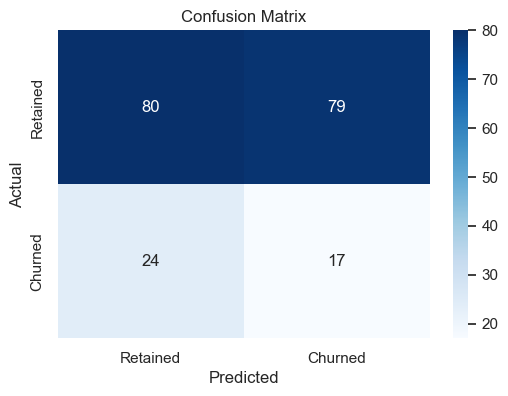

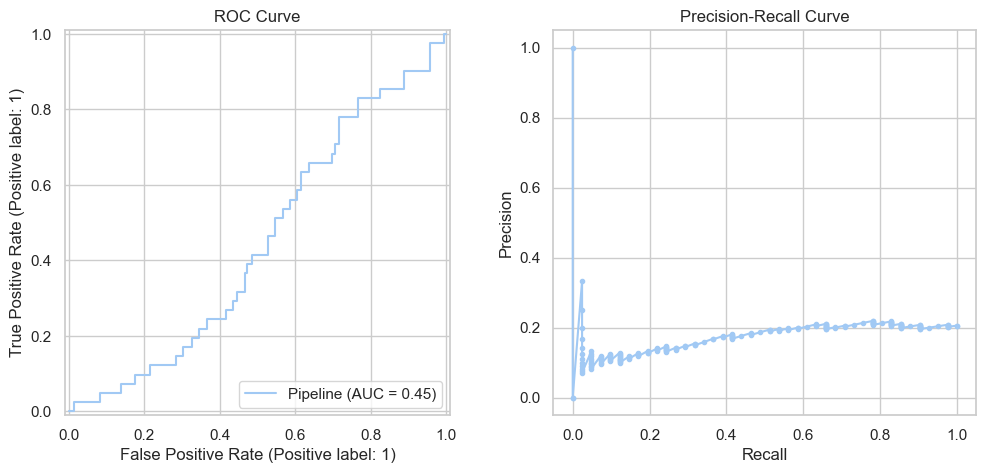


=== Training Random Forest ===
              precision    recall  f1-score   support

           0       0.78      0.89      0.84       159
           1       0.11      0.05      0.07        41

    accuracy                           0.72       200
   macro avg       0.44      0.47      0.45       200
weighted avg       0.65      0.72      0.68       200



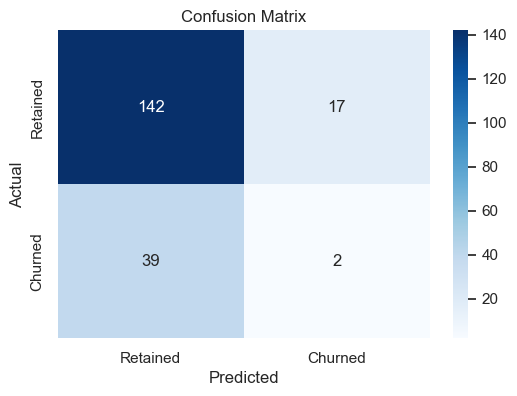

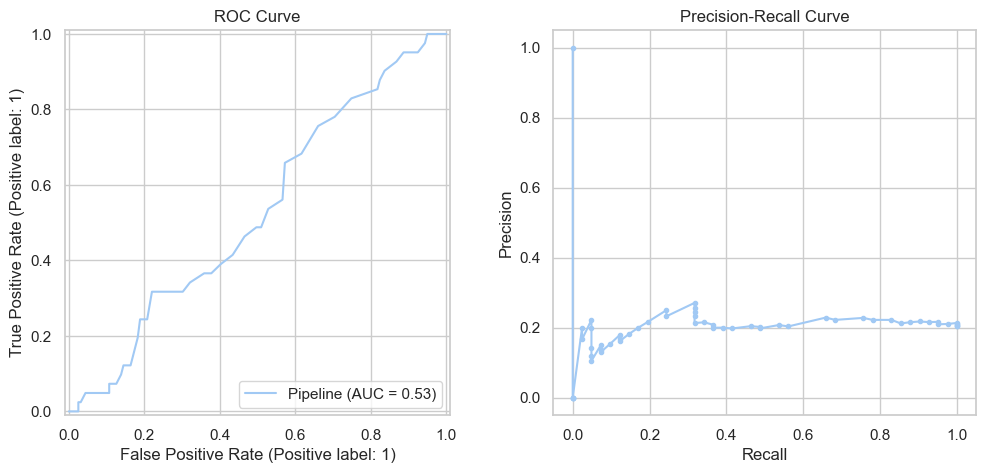


=== Training Gradient Boosting ===
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       159
           1       0.16      0.07      0.10        41

    accuracy                           0.73       200
   macro avg       0.47      0.49      0.47       200
weighted avg       0.66      0.73      0.69       200



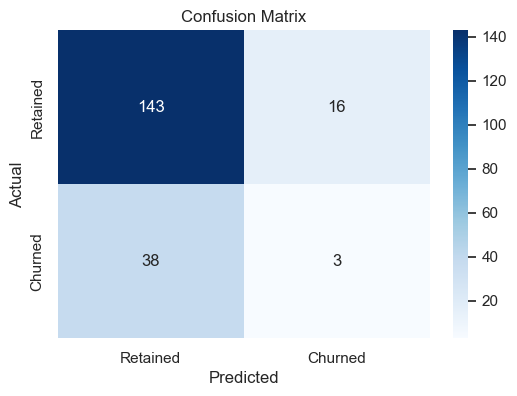

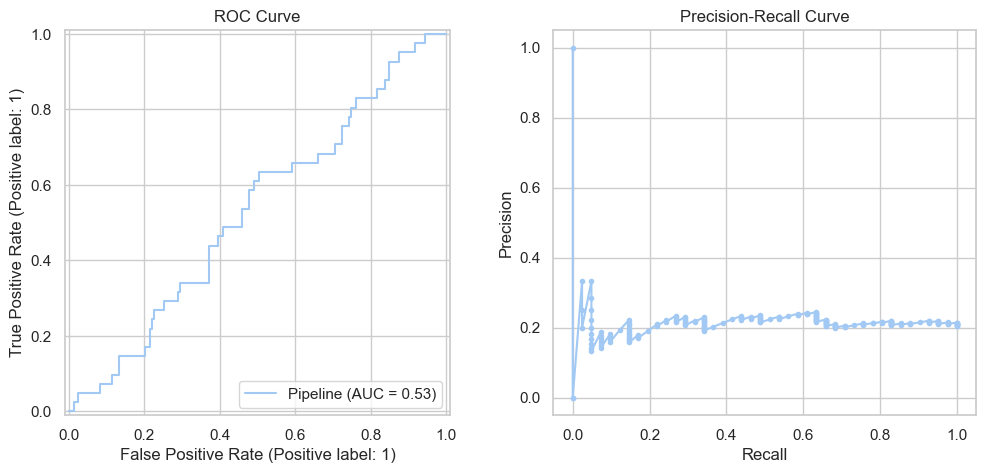


=== Training XGBoost ===
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       159
           1       0.18      0.15      0.16        41

    accuracy                           0.69       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.67      0.69      0.68       200



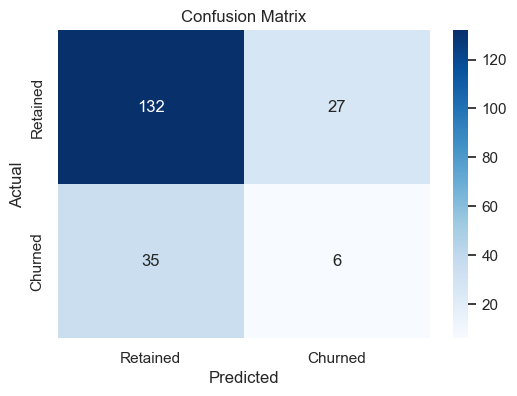

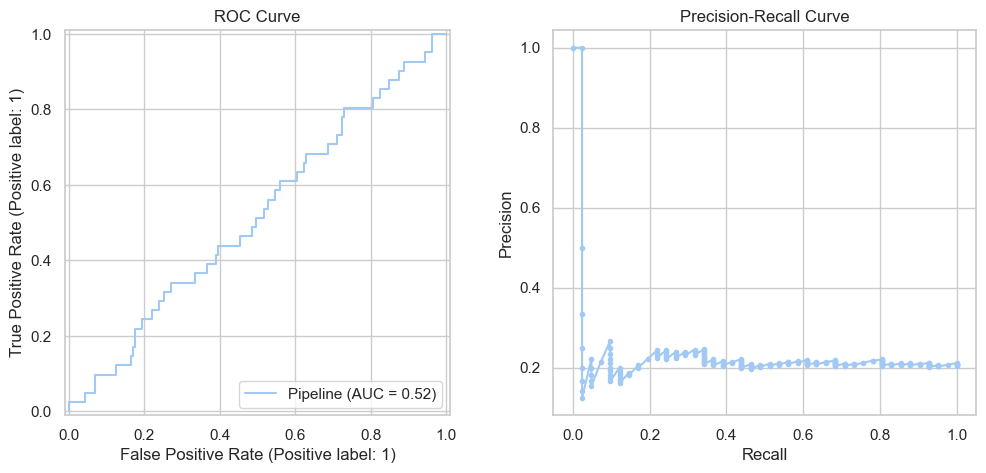


Selected best model: Logistic Regression
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'classifier__C': 10, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best F1 score: 0.3212
              precision    recall  f1-score   support

           0       0.76      0.48      0.59       159
           1       0.17      0.41      0.24        41

    accuracy                           0.47       200
   macro avg       0.47      0.45      0.42       200
weighted avg       0.64      0.47      0.52       200



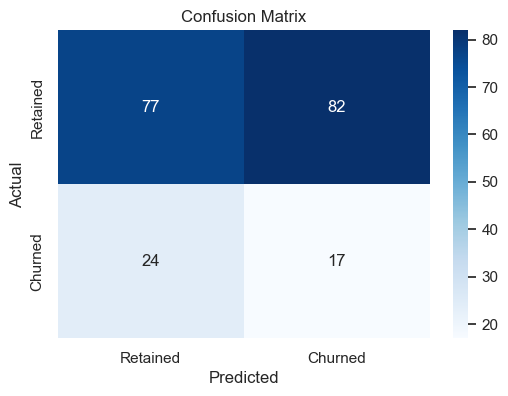

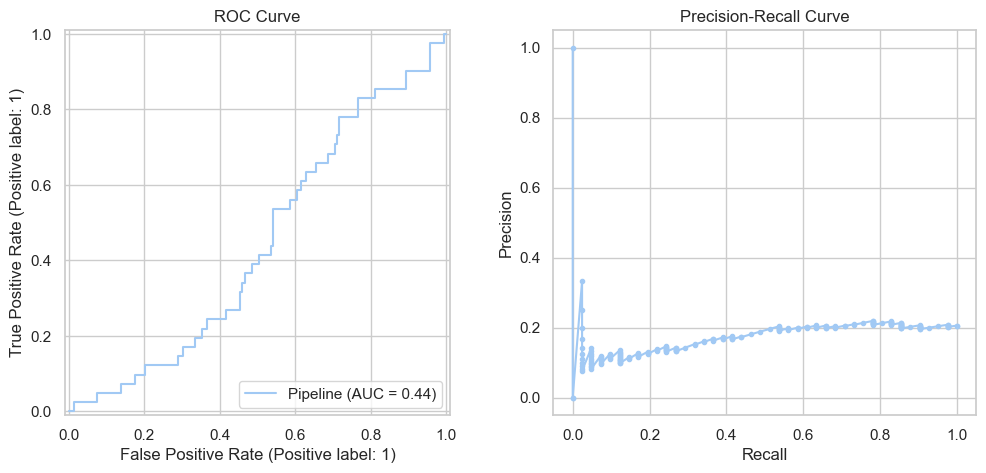

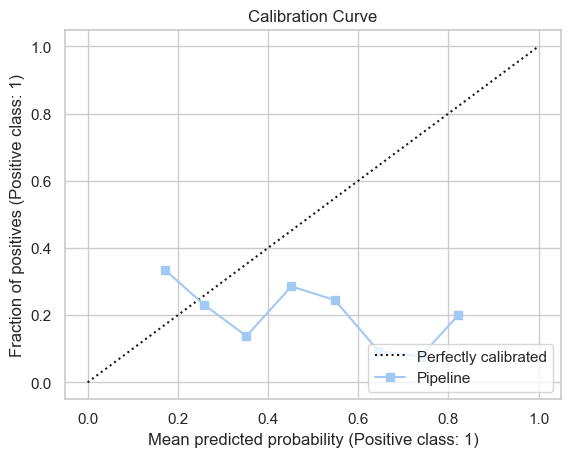


=== Business Recommendations ===
1. Combine model predictions with business rules to improve churn capture

=== Saving Artifacts ===
Saved model metrics to 'model_metrics.json'
Saved business recommendations to 'business_recommendations.json'

=== File Contents Preview ===

model_metrics.json:
{
    "accuracy": 0.47,
    "precision": 0.1717171717171717,
    "recall": 0.4146341463414634,
    "f1": 0.24285714285714285,
    "roc_auc": 0.44408651633686147,
    "pr_auc": 0.18326801352337785,
    "confusion_matrix": [
        [
            77,
            82
        ],
        [
            24,
            17
        ]
    ]
}

business_recommendations.json:
{
    "retention_strategies": [
        "Combine model predictions with business rules to improve churn capture"
    ],
    "model_performance": {
        "accuracy": 0.47,
        "precision": 0.1717171717171717,
        "recall": 0.4146341463414634,
        "f1": 0.24285714285714285,
        "roc_auc": 0.44408651633686147,
        "pr

In [236]:
# ======================
# CUSTOMER CHURN PREDICTION PIPELINE
# ======================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, roc_auc_score, confusion_matrix, 
                           classification_report, RocCurveDisplay,
                           precision_recall_curve, average_precision_score)
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import shap
import joblib
import json
from xgboost import XGBClassifier
from sklearn.calibration import CalibrationDisplay

# ======================
# 1. DATA PREPARATION
# ======================

def load_and_split_data():
    """Load preprocessed data and create train/test splits"""
    train_df = pd.read_csv('train_churn_data.csv')
    test_df = pd.read_csv('test_churn_data.csv')
    
    X_train = train_df.drop('ChurnStatus', axis=1)
    y_train = train_df['ChurnStatus']
    X_test = test_df.drop('ChurnStatus', axis=1)
    y_test = test_df['ChurnStatus']
    
    print(f"Training data: {X_train.shape[0]} samples, {X_train.shape[1]} features")
    print(f"Test data: {X_test.shape[0]} samples")
    print(f"Baseline churn rate: {y_train.mean():.2%}")
    
    return X_train, X_test, y_train, y_test

# ======================
# 2. MODEL DEVELOPMENT
# ======================

def initialize_models():
    """Initialize models with class weight balancing"""
    return {
        'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
        'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42),
        'XGBoost': XGBClassifier(scale_pos_weight=np.sqrt((1 - y_train.mean()) / y_train.mean()),
                                eval_metric='logloss', random_state=42)
    }

def evaluate_model(model, X_test, y_test):
    """Generate comprehensive evaluation metrics"""
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_prob),
        'pr_auc': average_precision_score(y_test, y_prob),
        'confusion_matrix': confusion_matrix(y_test, y_pred).tolist()
    }
    
    # Generate classification report
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    plt.figure(figsize=(6,4))
    sns.heatmap(metrics['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
                xticklabels=['Retained', 'Churned'],
                yticklabels=['Retained', 'Churned'])
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    # Plot ROC and PR curves
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
    RocCurveDisplay.from_estimator(model, X_test, y_test, ax=ax1)
    ax1.set_title('ROC Curve')
    
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    ax2.plot(recall, precision, marker='.')
    ax2.set_title('Precision-Recall Curve')
    ax2.set_xlabel('Recall')
    ax2.set_ylabel('Precision')
    plt.show()
    
    return metrics

def train_and_evaluate_models(models, X_train, y_train, X_test, y_test):
    """Train and evaluate multiple models with SMOTE"""
    results = {}
    
    for name, model in models.items():
        print(f"\n=== Training {name} ===")
        
        # Create pipeline with SMOTE and classifier
        pipeline = ImbPipeline([
            ('smote', SMOTE(random_state=42)),
            ('classifier', model)
        ])
        
        # Train model
        pipeline.fit(X_train, y_train)
        
        # Evaluate
        metrics = evaluate_model(pipeline, X_test, y_test)
        results[name] = {
            'model': pipeline,
            'metrics': metrics
        }
        
    return results

# ======================
# 3. MODEL OPTIMIZATION
# ======================

def optimize_best_model(best_model, X_train, y_train):
    """Perform hyperparameter tuning using GridSearchCV"""
    param_grid = {}
    
    if isinstance(best_model.named_steps['classifier'], RandomForestClassifier):
        param_grid = {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [None, 10, 20],
            'classifier__min_samples_split': [2, 5],
            'classifier__class_weight': ['balanced', None]
        }
    elif isinstance(best_model.named_steps['classifier'], (GradientBoostingClassifier, XGBClassifier)):
        param_grid = {
            'classifier__n_estimators': [100, 200],
            'classifier__learning_rate': [0.01, 0.1],
            'classifier__max_depth': [3, 5],
            'classifier__subsample': [0.8, 1.0]
        }
    else:  # Logistic Regression
        param_grid = {
            'classifier__C': [0.1, 1, 10],
            'classifier__penalty': ['l1', 'l2'],
            'classifier__solver': ['liblinear']
        }
    
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    grid_search = GridSearchCV(
        best_model,
        param_grid,
        cv=cv,
        scoring='f1',
        n_jobs=-1,
        verbose=1
    )
    
    grid_search.fit(X_train, y_train)
    
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best F1 score: {grid_search.best_score_:.4f}")
    
    return grid_search.best_estimator_

# ======================
# 4. MODEL INTERPRETATION
# ======================

def interpret_model(model, X_train, X_test, feature_names):
    """Generate model interpretation visualizations"""
    # Feature Importance
    if hasattr(model.named_steps['classifier'], 'feature_importances_'):
        importances = model.named_steps['classifier'].feature_importances_
        indices = np.argsort(importances)[-10:]  # Top 10 features
        
        plt.figure(figsize=(10,6))
        plt.title('Top 10 Feature Importances')
        plt.barh(range(len(indices)), importances[indices], color='b', align='center')
        plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
        plt.xlabel('Relative Importance')
        plt.show()
    
    # SHAP Values (for tree-based models)
    if isinstance(model.named_steps['classifier'], (RandomForestClassifier, GradientBoostingClassifier, XGBClassifier)):
        explainer = shap.TreeExplainer(model.named_steps['classifier'])
        shap_values = explainer.shap_values(X_test)
        
        plt.figure(figsize=(10,6))
        shap.summary_plot(shap_values, X_test, feature_names=feature_names, plot_type="bar", max_display=10)
        plt.title('SHAP Feature Importance')
        plt.show()
        
        # Individual explanation
        sample_idx = np.where(y_test == 1)[0][0]  # First churned customer
        shap.force_plot(explainer.expected_value, shap_values[sample_idx,:], 
                        X_test.iloc[sample_idx,:], feature_names=feature_names)
    
    # Calibration Curve
    CalibrationDisplay.from_estimator(model, X_test, y_test, n_bins=10)
    plt.title('Calibration Curve')
    plt.show()

# ======================
# 5. BUSINESS RECOMMENDATIONS
# ======================

def generate_recommendations(model, X_train, metrics):
    """Generate actionable business recommendations"""
    recommendations = {
        "retention_strategies": [],
        "model_performance": metrics,
        "key_findings": []
    }
    
    # Feature-based recommendations
    if hasattr(model.named_steps['classifier'], 'feature_importances_'):
        importances = pd.Series(
            model.named_steps['classifier'].feature_importances_,
            index=X_train.columns
        ).sort_values(ascending=False)
        
        top_features = importances.head(3).index.tolist()
        recommendations["key_findings"] = top_features
        
        for feature in top_features:
            if 'TotalSpent' in feature:
                recommendations["retention_strategies"].append(
                    "Target high-value customers (top 25% spenders) with personalized retention offers"
                )
            elif 'LoginFrequency' in feature:
                recommendations["retention_strategies"].append(
                    "Implement re-engagement campaigns for customers with declining login activity"
                )
            elif 'ResolutionRate' in feature:
                recommendations["retention_strategies"].append(
                    "Prioritize quick resolution for service tickets from high-risk customers"
                )
    
    # Threshold-based strategy
    if metrics['recall'] > 0.7:
        recommendations["retention_strategies"].append(
            "Focus on high-recall model predictions to capture most at-risk customers"
        )
    else:
        recommendations["retention_strategies"].append(
            "Combine model predictions with business rules to improve churn capture"
        )
    
    return recommendations

# ======================
# MAIN EXECUTION
# ======================

if __name__ == "__main__":
    # 1. Load and prepare data
    X_train, X_test, y_train, y_test = load_and_split_data()
    
    # 2. Initialize and evaluate models
    models = initialize_models()
    results = train_and_evaluate_models(models, X_train, y_train, X_test, y_test)
    
    # 3. Select and optimize best model
    best_model_name = max(results, key=lambda x: results[x]['metrics']['f1'])
    best_model = results[best_model_name]['model']
    print(f"\nSelected best model: {best_model_name}")
    
    optimized_model = optimize_best_model(best_model, X_train, y_train)
    final_metrics = evaluate_model(optimized_model, X_test, y_test)
    
    # 4. Model interpretation
    interpret_model(optimized_model, X_train, X_test, X_train.columns.tolist())
    
    # 5. Generate business recommendations
    recommendations = generate_recommendations(optimized_model, X_train, final_metrics)
    print("\n=== Business Recommendations ===")
    for i, rec in enumerate(recommendations["retention_strategies"], 1):
        print(f"{i}. {rec}")
    
    # 6. Save artifacts
    joblib.dump(optimized_model, 'optimized_churn_model.pkl')
    
    # Save and display JSON files
    print("\n=== Saving Artifacts ===")
    with open('model_metrics.json', 'w') as f:
        json.dump(final_metrics, f, indent=4)  # Indent for readability
    print("Saved model metrics to 'model_metrics.json'")
    
    with open('business_recommendations.json', 'w') as f:
        json.dump(recommendations, f, indent=4)
    print("Saved business recommendations to 'business_recommendations.json'")
    
    # Display file contents
    print("\n=== File Contents Preview ===")
    with open('model_metrics.json', 'r') as f:
        print("\nmodel_metrics.json:")
        print(f.read())
    
    with open('business_recommendations.json', 'r') as f:
        print("\nbusiness_recommendations.json:")
        print(f.read())
    
    print("\nModel and artifacts saved successfully")
